# Data analysis - BoligPortalen

In [9]:
# Import packages:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

In [10]:
# import data
bp_df = pd.read_csv('1_boligportalen.csv')
bp_df.head(15000)

,Adress,City,Street name,Postal code,Latitude,Longitude,Monthly rent,Aconto,Square meters,Rooms,...,Shareable,Pets allowed,Elevator,Senior frendly,Only for students,Balcony/Terrace,Parking,Energy label,Description,Link
0,"Albanigade, 5000 Odense, Odense C - 2. sal",Odense,Albanigade,5000.0,55.393856,10.394185,5.400 kr.,800 kr.,62 m²,2.0,...,Nej,Nej,Ja,Nej,Nej,Nej,Nej,NaN,"Boligen er en 2-værelses og udgør i alt 62,6 k...",https://www.boligportal.dk/lejligheder/odense/...
1,"Hovedgaden, 8410 Rønde - 1. sal",Rønde,Hovedgaden,8410.0,56.300211,10.477949,7.100 kr.,700 kr.,100 m²,4.0,...,Nej,Ja,Nej,Nej,Nej,Nej,Nej,D,"Lejligheden har 2 store sammenhængende stuer, ...",https://www.boligportal.dk/lejligheder/r%C3%B8...
2,"Digmannsvej, 9400 Aalborg, Nørresundby - 1. sal",Aalborg,Digmannsvej,9400.0,57.057390,9.936155,5.800 kr.,300 kr.,64 m²,2.0,...,Nej,Nej,Nej,Nej,Nej,Ja,Ja,NaN,Totalrenoveret lejlighed på 64 kvm. 2 vær. Lej...,https://www.boligportal.dk/lejligheder/aalborg...
3,"Lyngbyvej, 2100 København, København Ø - 2. sal",København,Lyngbyvej,2100.0,55.721333,12.556324,8.200 kr.,500 kr.,43 m²,1.0,...,Nej,Nej,Nej,Nej,Ja,Nej,Nej,NaN,Velkommen til Rygården ll\n\nHer finder du nyo...,https://www.boligportal.dk/lejligheder/k%C3%B8...
4,"Skejbygårdsvej, 8240 Aarhus, Risskov - 2. sal",Aarhus,Skejbygårdsvej,8240.0,56.199538,10.198303,8.195 kr.,600 kr.,60 m²,3.0,...,Ja,Ja,Ja,Ja,Nej,Ja,Ja,NaN,Velindrettet delevenlig 3-værelses kvalitetsle...,https://www.boligportal.dk/lejligheder/aarhus/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14381,"Urtehaven, 2640 København, Hedehusene - 2. sal",København,Urtehaven,2640.0,55.645165,12.200624,10.350 kr.,950 kr.,76 m²,2.0,...,Nej,Ja,Nej,Nej,Nej,Nej,Nej,A,Ejendommen\nModerne murstensejendom med store ...,https://www.boligportal.dk/lejligheder/k%C3%B8...
14382,"Hvesager, 7300 Jelling",Jelling,Hvesager,7300.0,55.748925,9.407440,3.046 kr.,420 kr.,31 m²,1.0,...,Nej,Ja,Nej,Nej,Nej,Nej,Nej,NaN,Hvis du lejer en bolig på Hvesager får du:\n\n...,https://www.boligportal.dk/r%C3%A6kkehuse/jell...
14383,"Bybækterrasserne, 3520 Farum",Farum,Bybækterrasserne,3520.0,55.818869,12.379435,2.400 kr.,900 kr.,12 m²,1.0,...,Ja,Ja,Nej,Nej,Nej,Ja,Ja,C,Skal respektere KAB bolig regler\nDele : opgan...,https://www.boligportal.dk/v%C3%A6relser/farum...
14384,"Bakkeborgdalen, 8600 Silkeborg",Silkeborg,Bakkeborgdalen,8600.0,56.203631,9.614604,9.395 kr.,NaN,110 m²,4.0,...,Nej,Ja,Nej,Nej,Nej,Nej,Nej,NaN,FLYT IND MED LEJERABAT: Underskriv lejekontrak...,https://www.boligportal.dk/r%C3%A6kkehuse/silk...


In [11]:
# Cleaning and transforming data from BoligPortalen:

# Delete Adress, Street name, Description and Link columns:
bp_df = bp_df.drop(['Adress', 'Street name', 'Description', 'Link'], axis=1)

# Transform data to correct format
bp_df['Monthly rent'] = bp_df['Monthly rent'].str.replace(' kr.', '').str.replace('.', '')
bp_df['Aconto'] = bp_df['Aconto'].str.replace(' kr.', '').str.replace('.', '')
bp_df['Square meters'] = bp_df['Square meters'].str.replace(' m²', '').str.replace('.', '')
bp_df['Rooms'] = bp_df['Rooms'].astype(str).str.replace('.0', '')
bp_df['Floor'] = bp_df['Floor'].astype(str).str.replace('.', '')
bp_df['Floor'] = bp_df['Floor'].str.replace('Stuen', '0')
bp_df['Floor'] = bp_df['Floor'].str.replace('Kælder', '-1')

# Convert to dummy variables
# Mapping for 'Nej' to 0 and 'Ja' to 1
mapping = {'Nej': 0, 'Ja': 1}

# List of columns to be converted
columns_to_convert = ['Furnished', 'Shareable', 'Pets allowed', 'Elevator', 'Senior frendly',
                      'Only for students', 'Balcony/Terrace', 'Parking']

# Apply mapping to specified columns
bp_df[columns_to_convert] = bp_df[columns_to_convert].replace(mapping)

# Replace "-" with NaN in the entire DataFrame
bp_df.replace("-", np.nan, inplace=True)

# Columns to convert to float
float_columns = [
    "Monthly rent", "Aconto", "Square meters", "Rooms", "Floor",
    "Furnished", "Shareable", "Pets allowed", "Elevator", "Senior frendly",
    "Only for students", "Balcony/Terrace", "Parking",
]

# Clean and convert columns to float
for col in float_columns:
    if bp_df[col].dtype == object:
        bp_df[col] = pd.to_numeric(bp_df[col].str.replace(',', ''), errors='coerce')

# Convert postal code to numeric (float) and then to int
bp_df['Postal code'] = pd.to_numeric(bp_df['Postal code'], errors='coerce').astype('Int64')

# Drop all rows with ['Property type'] != 'Lejlighed':
bp_df = bp_df[bp_df['Property type'] == 'Lejlighed']

# Count the occurrences of "Lejlighed" in the "Property type" column
lejlighed_count = (bp_df['Property type'] == 'Lejlighed').sum()

# Print the count
print("Number of 'Lejligheder':", lejlighed_count)

bp_df.head(50)

Number of 'Lejligheder': 11669


,City,Postal code,Latitude,Longitude,Monthly rent,Aconto,Square meters,Rooms,Floor,Property type,Furnished,Shareable,Pets allowed,Elevator,Senior frendly,Only for students,Balcony/Terrace,Parking,Energy label
0,Odense,5000,55.393856,10.394185,5400.0,800.0,62.0,2.0,2.0,Lejlighed,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,Rønde,8410,56.300211,10.477949,7100.0,700.0,100.0,4.0,1.0,Lejlighed,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D
2,Aalborg,9400,57.057390,9.936155,5800.0,300.0,64.0,2.0,1.0,Lejlighed,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
3,København,2100,55.721333,12.556324,8200.0,500.0,43.0,1.0,2.0,Lejlighed,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,Aarhus,8240,56.199538,10.198303,8195.0,600.0,60.0,3.0,2.0,Lejlighed,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN
5,Randers,8900,56.465990,10.034878,6300.0,650.0,109.0,3.0,2.0,Lejlighed,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,C
6,Odder,8300,55.973541,10.145876,7600.0,500.0,82.0,3.0,1.0,Lejlighed,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
7,Esbjerg,6700,55.465056,8.456541,8500.0,700.0,72.0,2.0,1.0,Lejlighed,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,D
9,Sunds,7451,56.204861,9.015997,5995.0,0.0,94.0,3.0,1.0,Lejlighed,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,D
10,Vojens,6500,55.243910,9.299112,5250.0,1250.0,85.0,3.0,0.0,Lejlighed,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,B


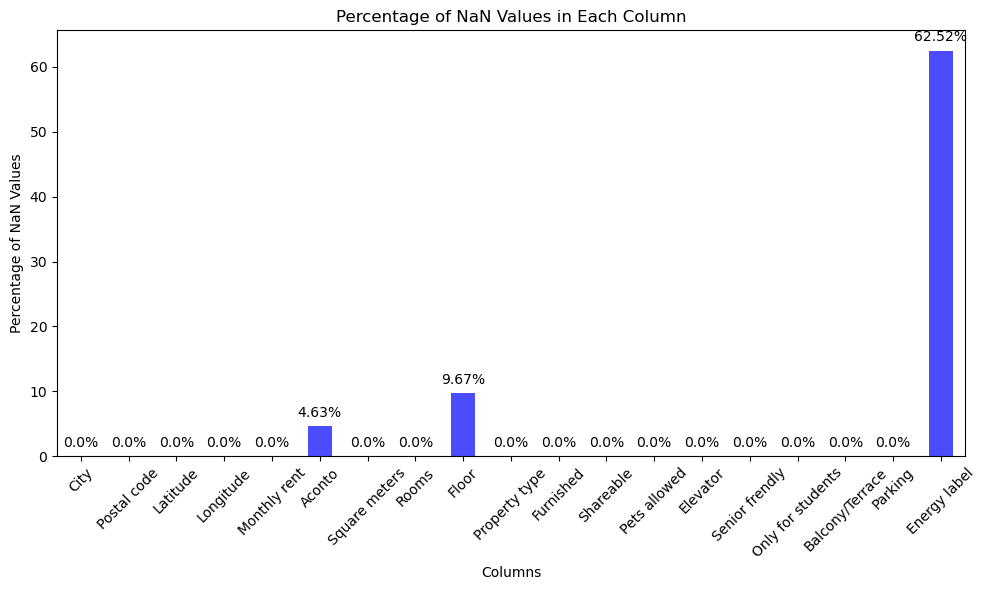

In [12]:
# Calculate the percentage of NaN values in each column
nan_percentages = (bp_df.isna().mean() * 100).round(2)

# Plot the bar plot
plt.figure(figsize=(10, 6))
nan_percentages.plot(kind='bar', color='blue', alpha=0.7)

# Add percentage labels on top of the bars
for index, value in enumerate(nan_percentages):
    plt.text(index, value + 1, f"{value}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Percentage of NaN Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of NaN Values")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Function to categorize postal codes
def categorize_postal_code(postal_code):
    # Floor divide by 1000 to get the category
    return f'{postal_code // 1000 * 1000}-{postal_code // 1000 * 1000 + 999}'

# Apply the function to the 'Postal code' column
bp_df['Postal Category'] = bp_df['Postal code'].apply(categorize_postal_code)

# Create dummy columns
postal_dummies = pd.get_dummies(bp_df['Postal Category'], prefix='PostalCode')

# Drop the 'Postal Category' column as it's not needed anymore
bp_df = bp_df.drop('Postal Category', axis=1)

# Concatenate the dummies to the original dataframe
bp_df = pd.concat([bp_df, postal_dummies], axis=1)

bp_df.head(50)

,City,Postal code,Latitude,Longitude,Monthly rent,Aconto,Square meters,Rooms,Floor,Property type,...,Energy label,PostalCode_1000-1999,PostalCode_2000-2999,PostalCode_3000-3999,PostalCode_4000-4999,PostalCode_5000-5999,PostalCode_6000-6999,PostalCode_7000-7999,PostalCode_8000-8999,PostalCode_9000-9999
0,Odense,5000,55.393856,10.394185,5400.0,800.0,62.0,2.0,2.0,Lejlighed,...,NaN,0,0,0,0,1,0,0,0,0
1,Rønde,8410,56.300211,10.477949,7100.0,700.0,100.0,4.0,1.0,Lejlighed,...,D,0,0,0,0,0,0,0,1,0
2,Aalborg,9400,57.057390,9.936155,5800.0,300.0,64.0,2.0,1.0,Lejlighed,...,NaN,0,0,0,0,0,0,0,0,1
3,København,2100,55.721333,12.556324,8200.0,500.0,43.0,1.0,2.0,Lejlighed,...,NaN,0,1,0,0,0,0,0,0,0
4,Aarhus,8240,56.199538,10.198303,8195.0,600.0,60.0,3.0,2.0,Lejlighed,...,NaN,0,0,0,0,0,0,0,1,0
5,Randers,8900,56.465990,10.034878,6300.0,650.0,109.0,3.0,2.0,Lejlighed,...,C,0,0,0,0,0,0,0,1,0
6,Odder,8300,55.973541,10.145876,7600.0,500.0,82.0,3.0,1.0,Lejlighed,...,NaN,0,0,0,0,0,0,0,1,0
7,Esbjerg,6700,55.465056,8.456541,8500.0,700.0,72.0,2.0,1.0,Lejlighed,...,D,0,0,0,0,0,1,0,0,0
9,Sunds,7451,56.204861,9.015997,5995.0,0.0,94.0,3.0,1.0,Lejlighed,...,D,0,0,0,0,0,0,1,0,0
10,Vojens,6500,55.243910,9.299112,5250.0,1250.0,85.0,3.0,0.0,Lejlighed,...,B,0,0,0,0,0,1,0,0,0


In [14]:
# Remove energy label
bp_df = bp_df.drop('Energy label', axis=1)

# Remove all rows with NaN values
bp_df = bp_df.dropna()

# Count the occurrences of "Lejlighed" in the "Property type" column
lejlighed_count = (bp_df['Property type'] == 'Lejlighed').sum()

# Print the count
print("Number of 'Lejligheder':", lejlighed_count)

Number of 'Lejligheder': 10114


In [15]:
# Save the dataframe as a csv file
##bp_df.to_csv('BP_Final_Data.csv', index=False)
